In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.svm import SVC
%matplotlib inline

In [2]:
data=pd.read_csv("sgemm_product.csv")
data.head()
#take average of 4 run
data["run_avg"]=np.mean(data.iloc[:,14:18],axis=1)

mean_run=np.mean(data["run_avg"])
print(mean_run)

#Binary Classification run_avg>mean_run
data["run_class"]=np.where(data['run_avg']>=mean_run, 1, 0)
data.groupby("run_class").size()

data.describe()


217.571953093958


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),run_avg,run_class
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669,217.571953,0.261370
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413,368.750161,0.439382
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000,13.317500,0.000000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000,40.667500,0.000000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000,69.790000,0.000000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000,228.387500,1.000000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000,3341.507500,1.000000


In [3]:
#Drop unwanted fields
sgemm_df=data.drop(columns=['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)','run_avg'])
sgemm_df.to_csv(r'segmm_product_classification.csv')
sgemm_df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,run_class
208830,128,128,16,8,32,16,32,8,8,1,1,1,1,0,0
109564,64,64,32,32,8,32,16,2,2,4,1,1,0,0,0
185445,128,64,32,8,16,8,16,8,2,2,0,1,0,1,0
52683,32,128,16,16,8,16,16,8,2,4,1,0,1,1,0
152392,128,32,16,8,16,16,8,2,2,1,1,0,0,0,0


In [4]:
#Varibale and predictor
y=np.array(sgemm_df["run_class"])

X=np.array(sgemm_df.iloc[:,0:14])


In [5]:
#Train Test Validation Split
from sklearn.model_selection import train_test_split

X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


X_train, X_val, y_train, y_val = train_test_split(X_train_80, y_train_80, test_size=0.2, random_state=1)

In [6]:
##Initial run for entire dataset
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
#Predict on Test Data
y_pred_t = svm_linear.predict(X_test)

In [8]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_t))
print(classification_report(y_test,y_pred_t))

[[14243   533]
 [  817  4407]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     14776
           1       0.89      0.84      0.87      5224

    accuracy                           0.93     20000
   macro avg       0.92      0.90      0.91     20000
weighted avg       0.93      0.93      0.93     20000



In [9]:
#Predict on Validation data
y_pred_v = svm_linear.predict(X_val)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val,y_pred_v))
print(classification_report(y_val,y_pred_v))

[[11402   403]
 [  666  3529]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     11805
           1       0.90      0.84      0.87      4195

    accuracy                           0.93     16000
   macro avg       0.92      0.90      0.91     16000
weighted avg       0.93      0.93      0.93     16000



In [2]:
##Resample and Train/Test split

In [8]:
sgemm_df=sgemm_df.loc[np.random.choice(sgemm_df.index, 50000, replace=False)]
y=np.array(sgemm_df["run_class"])

X=np.array(sgemm_df.iloc[:,0:14])

X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


X_train, X_val, y_train, y_val = train_test_split(X_train_80, y_train_80, test_size=0.2, random_state=1)

In [ ]:
##Linear Kernel Cross Validation

In [12]:

scores = []
n=10
i=0
mean_auc=0
accuracy_test=0
accuracy_train=0
svm_linear_cv = SVC(kernel='linear')
cv = KFold(n_splits=n, random_state=42, shuffle=False)

In [13]:
for train_index, test_index in cv.split(X_train_80):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index)
    X_train_cv, X_test_cv= X_train_80[train_index], X_train_80[test_index]
    y_train_cv, y_test_cv = y_train_80[train_index], y_train_80[test_index]
    
    # train model and make predictions    
    svm_linear_cv.fit(X_train_cv, y_train_cv) 
    
    #predict train
    preds_train = svm_linear_cv.predict(X_train_cv)

    #predict test
    preds_test = svm_linear_cv.predict(X_test_cv)
    
    i+=1
    # compute AUC metric for this CV fold
    fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, preds_test)
    roc_auc = metrics.auc(fpr, tpr)
    print ("AUC (fold "+str(i)+"/"+str(n)+"): "+str(roc_auc))
    mean_auc += roc_auc
    
    print("Accuracy Test Fold "+str(i)+" : "+str(metrics.accuracy_score(y_test_cv,preds_test)*100))
    accuracy_test+=metrics.accuracy_score(y_test_cv,preds_test)*100
    print("Accuracy Train Fold "+str(i)+" : "+str(metrics.accuracy_score(y_train_cv,preds_train)*100))
    accuracy_train+=metrics.accuracy_score(y_train_cv,preds_train)*100
    print( " ")
    
print ("Mean AUC: "+str(mean_auc/n) )
print ("Mean Test Accuracy: "+str(accuracy_test/n))
print ("Mean Train Accuracy: "+str(accuracy_train/n))

Train Index:  [ 4000  4001  4002 ... 39997 39998 39999]
Test Index:  [   0    1    2 ... 3997 3998 3999]
AUC (fold 1/10): 0.9061911492242969
Accuracy Test Fold 1 : 93.65
Accuracy Train Fold 1 : 93.31388888888888
 
Train Index:  [    0     1     2 ... 39997 39998 39999]
Test Index:  [4000 4001 4002 ... 7997 7998 7999]
AUC (fold 2/10): 0.8989009548578277
Accuracy Test Fold 2 : 93.27499999999999
Accuracy Train Fold 2 : 93.29166666666666
 
Train Index:  [    0     1     2 ... 39997 39998 39999]
Test Index:  [ 8000  8001  8002 ... 11997 11998 11999]
AUC (fold 3/10): 0.905382316614495
Accuracy Test Fold 3 : 93.7
Accuracy Train Fold 3 : 93.28333333333333
 
Train Index:  [    0     1     2 ... 39997 39998 39999]
Test Index:  [12000 12001 12002 ... 15997 15998 15999]
AUC (fold 4/10): 0.8924954465171399
Accuracy Test Fold 4 : 92.45
Accuracy Train Fold 4 : 93.43055555555554
 
Train Index:  [    0     1     2 ... 39997 39998 39999]
Test Index:  [16000 16001 16002 ... 19997 19998 19999]
AUC (fold 5

In [ ]:
##Learning Curve

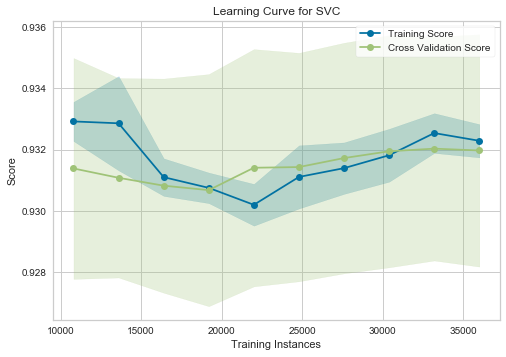

In [51]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    svm_linear_cv, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train_80,y_train_80)        # Fit the data to the visualizer
visualizer.show() 

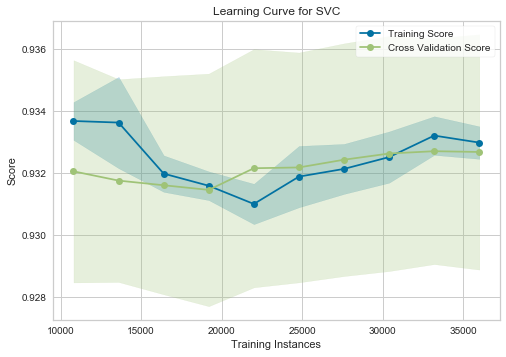

In [52]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    svm_linear_cv, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train_80,y_train_80)        # Fit the data to the visualizer
visualizer.show() 

In [53]:
#Predict on test for Linear
y_pred_1 = svm_linear_cv.predict(X_test)


In [54]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_1))
print(classification_report(y_test,y_pred_1))

[[7168  268]
 [ 392 2172]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7436
           1       0.89      0.85      0.87      2564

    accuracy                           0.93     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.93      0.93      0.93     10000



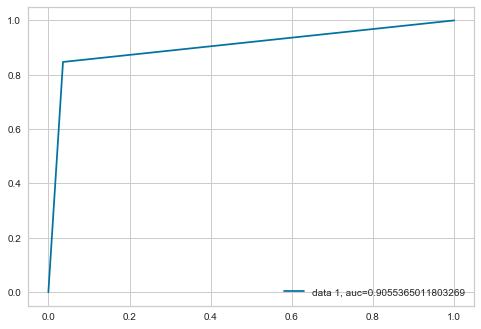

In [55]:
#ROC-AUC curve
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_1)
auc = metrics.roc_auc_score(y_test, y_pred_1)
plt.plot(fpr,tpr,label=", auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
##RBF Kernel Cross Validation

In [12]:

scores = []
n=10
i=0
mean_auc=0
accuracy_test=0
accuracy_train=0
svm_rbf_cv = SVC(kernel='rbf')
cv = KFold(n_splits=n, random_state=42, shuffle=False)


In [13]:
for train_index, test_index in cv.split(X_train_80):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index)
    X_train_cv, X_test_cv= X_train_80[train_index], X_train_80[test_index]
    y_train_cv, y_test_cv = y_train_80[train_index], y_train_80[test_index]

    # train model and make predictions         
    svm_rbf_cv.fit(X_train_cv, y_train_cv) 
    
    #predict train
    preds_train = svm_rbf_cv.predict(X_train_cv)

    #predict test
    preds_test = svm_rbf_cv.predict(X_test_cv)
    
    i+=1
    # compute AUC metric for this CV fold
    fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, preds_test)
    roc_auc = metrics.auc(fpr, tpr)
    print ("AUC (fold "+str(i)+"/"+str(n)+"): "+str(roc_auc))
    mean_auc += roc_auc
    
    print("Accuracy Test Fold "+str(i)+" : "+str(metrics.accuracy_score(y_test_cv,preds_test)*100))
    accuracy_test+=metrics.accuracy_score(y_test_cv,preds_test)*100
    print("Accuracy Train Fold "+str(i)+" : "+str(metrics.accuracy_score(y_train_cv,preds_train)*100))
    accuracy_train+=metrics.accuracy_score(y_train_cv,preds_train)*100
    print( " ")
    
print ("Mean AUC: "+str(mean_auc/n) )
print ("Mean Test Accuracy: "+str(accuracy_test/n))
print ("Mean Train Accuracy: "+str(accuracy_train/n))

Train Index:  [ 4000  4001  4002 ... 39997 39998 39999]
Test Index:  [   0    1    2 ... 3997 3998 3999]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 1/10): 0.8999374917752336
Accuracy Test Fold 1 : 92.825
Accuracy Train Fold 1 : 94.69999999999999
 
Train Index:  [    0     1     2 ... 39997 39998 39999]
Test Index:  [4000 4001 4002 ... 7997 7998 7999]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 2/10): 0.8909109800630411
Accuracy Test Fold 2 : 92.2
Accuracy Train Fold 2 : 94.88888888888889
 
Train Index:  [    0     1     2 ... 39997 39998 39999]
Test Index:  [ 8000  8001  8002 ... 11997 11998 11999]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 3/10): 0.8799958118795612
Accuracy Test Fold 3 : 91.725
Accuracy Train Fold 3 : 94.75
 
Train Index:  [    0     1     2 ... 39997 39998 39999]
Test Index:  [12000 12001 12002 ... 15997 15998 15999]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 4/10): 0.8934005430377591
Accuracy Test Fold 4 : 92.60000000000001
Accuracy Train Fold 4 : 94.65555555555557
 
Train Index:  [    0     1     2 ... 39997 39998 39999]
Test Index:  [16000 16001 16002 ... 19997 19998 19999]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 5/10): 0.8921647609147608
Accuracy Test Fold 5 : 92.625
Accuracy Train Fold 5 : 94.60555555555555
 
Train Index:  [    0     1     2 ... 39997 39998 39999]
Test Index:  [20000 20001 20002 ... 23997 23998 23999]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 6/10): 0.8833478102779573
Accuracy Test Fold 6 : 91.77499999999999
Accuracy Train Fold 6 : 94.77222222222223
 
Train Index:  [    0     1     2 ... 39997 39998 39999]
Test Index:  [24000 24001 24002 ... 27997 27998 27999]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 7/10): 0.8961053227160692
Accuracy Test Fold 7 : 92.7
Accuracy Train Fold 7 : 94.73611111111111
 
Train Index:  [    0     1     2 ... 39997 39998 39999]
Test Index:  [28000 28001 28002 ... 31997 31998 31999]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 8/10): 0.8933571072838858
Accuracy Test Fold 8 : 92.5
Accuracy Train Fold 8 : 94.75
 
Train Index:  [    0     1     2 ... 39997 39998 39999]
Test Index:  [32000 32001 32002 ... 35997 35998 35999]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 9/10): 0.8859630230703182
Accuracy Test Fold 9 : 92.07499999999999
Accuracy Train Fold 9 : 94.72222222222221
 
Train Index:  [    0     1     2 ... 35997 35998 35999]
Test Index:  [36000 36001 36002 ... 39997 39998 39999]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 10/10): 0.8828657009316687
Accuracy Test Fold 10 : 91.75
Accuracy Train Fold 10 : 94.84722222222223
 
Mean AUC: 0.8898048551950255
Mean Test Accuracy: 92.2775
Mean Train Accuracy: 94.74277777777777


In [14]:
#rbf - predict for Test
y_pred_2 = svm_rbf_cv.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_2))
print(classification_report(y_test,y_pred_2))

[[7117  328]
 [ 546 2009]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7445
           1       0.86      0.79      0.82      2555

    accuracy                           0.91     10000
   macro avg       0.89      0.87      0.88     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
#Learning Curve

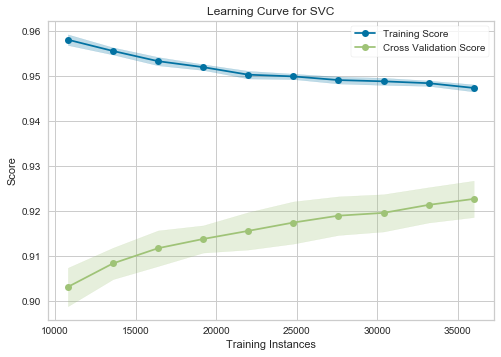

In [16]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    svm_rbf_cv, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train_80,y_train_80)        # Fit the data to the visualizer
visualizer.show() 

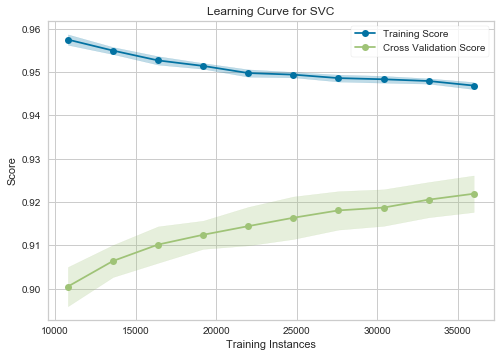

In [18]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    svm_rbf_cv, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train_80,y_train_80)        # Fit the data to the visualizer
visualizer.show() 

In [ ]:
##Polynomial Kernel

In [11]:

scores = []
n=10
i=0
mean_auc=0
accuracy_test=0
accuracy_train=0
svm_poly_cv = SVC(kernel='poly')
cv = KFold(n_splits=n, random_state=42, shuffle=False)
#print(cv.split(X_train_80))

In [ ]:
for train_index, test_index in cv.split(X_train_80):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index)
    X_train_cv, X_test_cv= X_train_80[train_index], X_train_80[test_index]
    y_train_cv, y_test_cv = y_train_80[train_index], y_train_80[test_index]

    # train model and make predictions
    svm_poly_cv.fit(X_train_cv, y_train_cv) 
    
    #predict train
    preds_train = svm_poly_cv.predict(X_train_cv)

    #predict test
    preds_test = svm_poly_cv.predict(X_test_cv)
    
    i+=1
    # compute AUC metric for this CV fold
    fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, preds_test)
    roc_auc = metrics.auc(fpr, tpr)
    print ("AUC (fold "+str(i)+"/"+str(n)+"): "+str(roc_auc))
    mean_auc += roc_auc
    
    print("Accuracy Test Fold "+str(i)+" : "+str(metrics.accuracy_score(y_test_cv,preds_test)*100))
    accuracy_test+=metrics.accuracy_score(y_test_cv,preds_test)*100
    print("Accuracy Train Fold "+str(i)+" : "+str(metrics.accuracy_score(y_train_cv,preds_train)*100))
    accuracy_train+=metrics.accuracy_score(y_train_cv,preds_train)*100
    print( " ")
    
print ("Mean AUC: "+str(mean_auc/n) )
print ("Mean Test Accuracy: "+str(accuracy_test/n))
print ("Mean Train Accuracy: "+str(accuracy_train/n))

Train Index:  [ 8000  8001  8002 ... 79997 79998 79999]
Test Index:  [   0    1    2 ... 7997 7998 7999]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC (fold 1/10): 0.9500973741007549
Accuracy Test Fold 1 : 96.22500000000001
Accuracy Train Fold 1 : 96.4875
 
Train Index:  [    0     1     2 ... 79997 79998 79999]
Test Index:  [ 8000  8001  8002 ... 15997 15998 15999]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
#poly - predict for Test 
y_pred_3 = svm_poly_cv.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_3))
print(classification_report(y_test,y_pred_3))

In [ ]:
#Plot ROC-AUC for all three predictions

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_1)
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_2)
fpr3,tpr3, _ = metrics.roc_curve(y_test, y_pred_3)

auc1 = metrics.roc_auc_score(y_test, y_pred_1)
auc2 = metrics.roc_auc_score(y_test, y_pred_2)
auc3 = metrics.roc_auc_score(y_test, y_pred_3)
plt.plot(fpr1,tpr1,label="Linear, auc="+str(auc1))
plt.plot(fpr2,tpr2,label="RBF, auc="+str(auc2))
plt.plot(fpr3,tpr3,label="Poly, auc="+str(auc3))

plt.legend(loc=4)
plt.show()

In [ ]:
##Perform Grid Search to find the best hyperparamter

In [12]:
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

print("Best Parameters for rbf :",svc_param_selection(X_train_80,y_train_80,cv))

Best Parameters for rbf : {'C': 10, 'gamma': 0.001}


In [13]:
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

print("Best Parameters for linear :",svc_param_selection(X_train_80,y_train_80,cv))

Best Parameters for linear : {'C': 0.001, 'gamma': 0.001}


In [ ]:
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

print("Best Parameters for linear :",svc_param_selection(X_train_80,y_train_80,cv))

In [ ]:
#Run the model with linear Kernel for the best hyperparameters

In [ ]:

scores = []
n=10
i=0
mean_auc=0
accuracy_test=0
accuracy_train=0
svm_sig_cv = SVC(kernel='linear',C= 0.001, gamma = 0.001)
cv = KFold(n_splits=n, random_state=42, shuffle=False)


In [ ]:
for train_index, test_index in cv.split(X_train_80):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index)
    X_train_cv, X_test_cv= X_train_80[train_index], X_train_80[test_index]
    y_train_cv, y_test_cv = y_train_80[train_index], y_train_80[test_index]

    # train model and make predictions
    svm_sig_cv.fit(X_train_cv, y_train_cv) 
    
    #predict train
    preds_train = svm_sig_cv.predict(X_train_cv)

    #predict test
    preds_test = svm_sig_cv.predict(X_test_cv)
    
    i+=1
    # compute AUC metric for this CV fold
    fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, preds_test)
    roc_auc = metrics.auc(fpr, tpr)
    print ("AUC (fold "+str(i)+"/"+str(n)+"): "+str(roc_auc))
    mean_auc += roc_auc
    
    print("Accuracy Test Fold "+str(i)+" : "+str(metrics.accuracy_score(y_test_cv,preds_test)*100))
    accuracy_test+=metrics.accuracy_score(y_test_cv,preds_test)*100
    print("Accuracy Train Fold "+str(i)+" : "+str(metrics.accuracy_score(y_train_cv,preds_train)*100))
    accuracy_train+=metrics.accuracy_score(y_train_cv,preds_train)*100
    print( " ")
    
print ("Mean AUC: "+str(mean_auc/n) )
print ("Mean Test Accuracy: "+str(accuracy_test/n))
print ("Mean Train Accuracy: "+str(accuracy_train/n))

In [ ]:
y_pred = svm_sig_cv.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))